<a href="https://colab.research.google.com/github/sakshamkumar1/tensorflow-notebooks/blob/main/exercises_05_transfer_learning_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-04-30 05:51:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-04-30 05:51:07 (93.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [39]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys,\
unzip_data, walk_through_dir

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2023-04-30 05:51:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.96.128, 108.177.119.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.96.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  39.9MB/s    in 4.7s    

2023-04-30 05:51:13 (34.2 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [6]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent

### 1. Using feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using tf.keras.applications.EfficientNetB0 as the base model. Using the ModelCheckpoint callback to save the weights to file.

In [7]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE,
                                                                 batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch",
                                                         verbose=1)

In [9]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x = base_model(inputs, training=False)

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_0 = model_0.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[checkpoint_callback])

16705208/16705208 [==============================] - 1s 0us/step
Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 1.9118 - accuracy: 0.4200
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 30s 448ms/step - loss: 1.9118 - accuracy: 0.4200 - val_loss: 1.3062 - val_accuracy: 0.7468
Epoch 2/10
23/24 [===========================>..] - ETA: 0s - loss: 1.0843 - accuracy: 0.7717
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 7s 302ms/step - loss: 1.0821 - accuracy: 0.7693 - val_loss: 0.8629 - val_accuracy: 0.8292
Epoch 3/10
23/24 [===========================>..] - ETA: 0s - loss: 0.7644 - accuracy: 0.8383
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 8s 300ms/step - loss: 0.7627 - accuracy: 0.8387 - val_loss: 0.6942 - val_accuracy: 0.8416
Epoch 4/10
23/24 [====

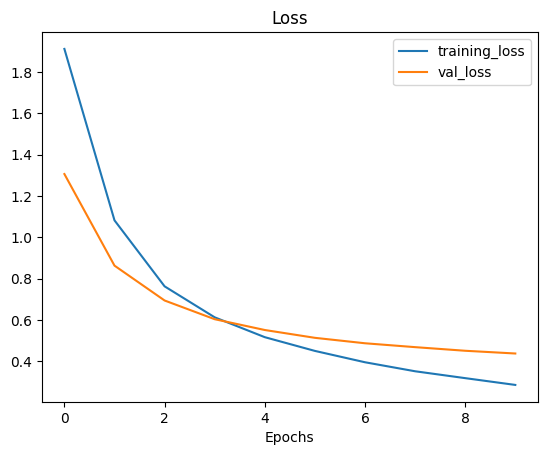

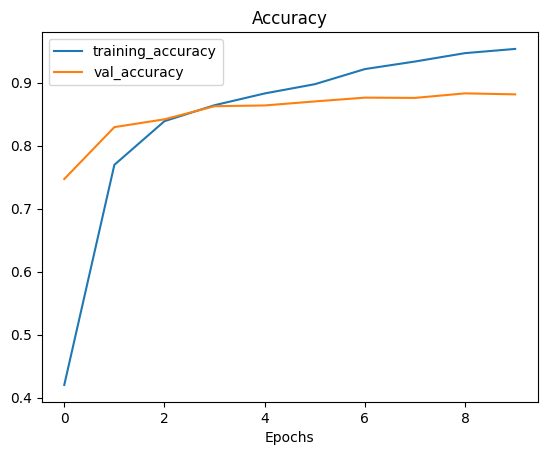

In [10]:
plot_loss_curves(history_0)

### 2. Fine-tuning the last 20 layers of the base model we trained for another 10 epochs.

In [11]:
model_0.layers

In [12]:
for layer in model_0.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f080f9c7400> True
<keras.engine.functional.Functional object at 0x7f07fc8c53f0> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7f0805a48460> True
<keras.layers.core.dense.Dense object at 0x7f07fc874f10> True


In [13]:
model_0.layers[1]

In [14]:
for i, layer in enumerate(model_0.layers[1].layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39

In [15]:
initial_epochs = 10

base_model.trainable = True


In [16]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_1 True
1 rescaling True
2 normalization True
3 rescaling_1 True
4 stem_conv_pad True
5 stem_conv True
6 stem_bn True
7 stem_activation True
8 block1a_dwconv True
9 block1a_bn True
10 block1a_activation True
11 block1a_se_squeeze True
12 block1a_se_reshape True
13 block1a_se_reduce True
14 block1a_se_expand True
15 block1a_se_excite True
16 block1a_project_conv True
17 block1a_project_bn True
18 block2a_expand_conv True
19 block2a_expand_bn True
20 block2a_expand_activation True
21 block2a_dwconv_pad True
22 block2a_dwconv True
23 block2a_bn True
24 block2a_activation True
25 block2a_se_squeeze True
26 block2a_se_reshape True
27 block2a_se_reduce True
28 block2a_se_expand True
29 block2a_se_excite True
30 block2a_project_conv True
31 block2a_project_bn True
32 block2b_expand_conv True
33 block2b_expand_bn True
34 block2b_expand_activation True
35 block2b_dwconv True
36 block2b_bn True
37 block2b_activation True
38 block2b_se_squeeze True
39 block2b_se_reshape True
40 block2b_se_

In [17]:
for layer in base_model.layers[:-20]:
  layer.trainable=False

In [18]:
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [19]:
fine_tune_epochs = initial_epochs + 10

history_fine_tune_1 = model_0.fit(train_data,
                                  epochs=fine_tune_epochs,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  initial_epoch=initial_epochs,
                                  callbacks=[checkpoint_callback])

Epoch 11/20
24/24 [==============================] - ETA: 0s - loss: 0.2338 - accuracy: 0.9520
Epoch 11: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 22s 433ms/step - loss: 0.2338 - accuracy: 0.9520 - val_loss: 0.3717 - val_accuracy: 0.8768
Epoch 12/20
23/24 [===========================>..] - ETA: 0s - loss: 0.1251 - accuracy: 0.9769
Epoch 12: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 10s 405ms/step - loss: 0.1264 - accuracy: 0.9760 - val_loss: 0.3523 - val_accuracy: 0.8864
Epoch 13/20
23/24 [===========================>..] - ETA: 0s - loss: 0.0757 - accuracy: 0.9878
Epoch 13: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 8s 312ms/step - loss: 0.0754 - accuracy: 0.9880 - val_loss: 0.3563 - val_accuracy: 0.8824
Epoch 14/20
23/24 [===========================>..] - ETA: 0s - loss: 0.0434 - ac

### 3. Fine-tuning the last 30 layers of the base model we trained for another 10 epochs.

In [20]:
for layer in base_model.layers[:-30]:
  layer.trainable = False

In [21]:
for i, layer in enumerate(model_0.layers[1].layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39

In [22]:
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                                      optimizer=tf.keras.optimizers.Adam(),
                                      metrics=["accuracy"])

In [23]:
initial_epochs = fine_tune_epochs
fine_tune_epochs = initial_epochs + 10

history_fine_tune_2 = model_0.fit(train_data,
                                  epochs=fine_tune_epochs,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  initial_epoch=initial_epochs,
                                  callbacks=[checkpoint_callback])

Epoch 21/30
23/24 [===========================>..] - ETA: 0s - loss: 0.1706 - accuracy: 0.9524
Epoch 21: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 21s 409ms/step - loss: 0.1739 - accuracy: 0.9520 - val_loss: 0.6256 - val_accuracy: 0.8148
Epoch 22/30
23/24 [===========================>..] - ETA: 0s - loss: 0.0832 - accuracy: 0.9796
Epoch 22: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 8s 326ms/step - loss: 0.0831 - accuracy: 0.9787 - val_loss: 0.5371 - val_accuracy: 0.8564
Epoch 23/30
23/24 [===========================>..] - ETA: 0s - loss: 0.0215 - accuracy: 0.9946
Epoch 23: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 9s 328ms/step - loss: 0.0211 - accuracy: 0.9947 - val_loss: 0.4696 - val_accuracy: 0.8720
Epoch 24/30
23/24 [===========================>..] - ETA: 0s - loss: 0.0033 - acc

In [24]:
results_fine_tune_2 = model_0.evaluate(test_data)
print(results_fine_tune_2)

79/79 [==============================] - 6s 65ms/step - loss: 0.4764 - accuracy: 0.8784
[0.47644752264022827, 0.8784000277519226]


In [25]:
from helper_functions import pred_and_plot

In [26]:
import pathlib
data_dir = pathlib.Path("10_food_classes_10_percent/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [41]:
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  return target_folder + "/" + random_image[0]

['1098844.jpg']


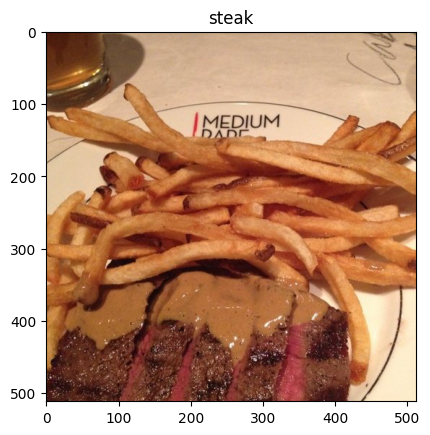

In [46]:
target_dir = "10_food_classes_10_percent/train/"
target_class = 'steak'

filename = view_random_image(target_dir, target_class)

In [47]:
filename

'10_food_classes_10_percent/train/steak/1098844.jpg'

In [48]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = f.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  
  return img

1/1 [==============================] - 0s 25ms/step


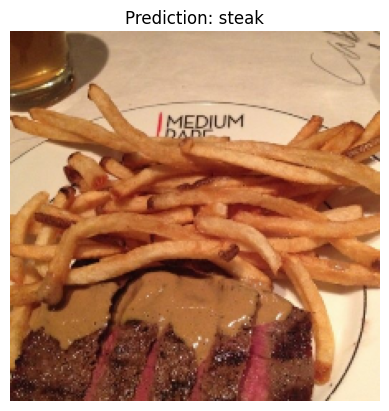

In [49]:
pred_and_plot(model_0, filename, class_names)